## Y- Encoded Labels
__Angry--1__<br>
__Disgust --2__<br>
__Fear--3__<br>
__Happy--4__<br>
__Neutral--5__<br>
__Sad--6__<br>
__Surprise--7__

## Mapping real-world to ML Problem

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
from sklearn.model_selection import train_test_split
from keras.layers import Dropout, Dense
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model
from keras.applications import VGG16
from sklearn.metrics import accuracy_score, confusion_matrix

Using TensorFlow backend.


## 1. Reading the Data of Human Images

### Angry

In [2]:
human_angry = glob.glob("../Data/Human/Angry/*")
# human_angry.remove('../Data/Human/Angry\\Thumbs.db')
print("Number of images in Angry emotion = "+str(len(human_angry)))

Number of images in Angry emotion = 119


In [3]:
human_angry_folderName = [str(i.split("\\")[0])+"/" for i in human_angry]
human_angry_imageName = [str(i.split("\\")[1]) for i in human_angry]
human_angry_emotion = [["Angry"]*len(human_angry)][0]
human_angry_label = [1]*len(human_angry)

len(human_angry_folderName), len(human_angry_imageName), len(human_angry_emotion), len(human_angry_label)

(119, 119, 119, 119)

In [4]:
df_angry = pd.DataFrame()
df_angry["folderName"] = human_angry_folderName
df_angry["imageName"] = human_angry_imageName
df_angry["Emotion"] = human_angry_emotion
df_angry["Labels"] = human_angry_label
df_angry.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Angry/,0.png,Angry,1
1,../Data/Human/Angry/,1.png,Angry,1
2,../Data/Human/Angry/,107.png,Angry,1
3,../Data/Human/Angry/,108.png,Angry,1
4,../Data/Human/Angry/,109.png,Angry,1


### Disgust

In [5]:
human_disgust = glob.glob("../Data/Human/Disgust/*")
# human_disgust.remove('../Data/Human/Disgust\\Thumbs.db')
print("Number of images in Disgust emotion = "+str(len(human_disgust)))

Number of images in Disgust emotion = 146


In [6]:
human_disgust_folderName = [str(i.split("\\")[0])+"/" for i in human_disgust]
human_disgust_imageName = [str(i.split("\\")[1]) for i in human_disgust]
human_disgust_emotion = [["Disgust"]*len(human_disgust)][0]
human_disgust_label = [2]*len(human_disgust)

len(human_disgust_folderName), len(human_disgust_imageName), len(human_disgust_emotion), len(human_disgust_label)

(146, 146, 146, 146)

In [7]:
df_disgust = pd.DataFrame()
df_disgust["folderName"] = human_disgust_folderName
df_disgust["imageName"] = human_disgust_imageName
df_disgust["Emotion"] = human_disgust_emotion
df_disgust["Labels"] = human_disgust_label
df_disgust.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Disgust/,KA.DI1.42.tiff,Disgust,2
1,../Data/Human/Disgust/,KA.DI2.43.tiff,Disgust,2
2,../Data/Human/Disgust/,KA.DI3.44.tiff,Disgust,2
3,../Data/Human/Disgust/,KL.DI1.170.tiff,Disgust,2
4,../Data/Human/Disgust/,KL.DI2.171.tiff,Disgust,2


### Fear

In [8]:
human_fear = glob.glob("../Data/Human/Fear/*")
# human_fear.remove('../Data/Human/Fear\\Thumbs.db')
print("Number of images in Fear emotion = "+str(len(human_fear)))

Number of images in Fear emotion = 80


In [9]:
human_fear_folderName = [str(i.split("\\")[0])+"/" for i in human_fear]
human_fear_imageName = [str(i.split("\\")[1]) for i in human_fear]
human_fear_emotion = [["Fear"]*len(human_fear)][0]
human_fear_label = [3]*len(human_fear)

len(human_fear_folderName), len(human_fear_imageName), len(human_fear_emotion), len(human_fear_label)

(80, 80, 80, 80)

In [10]:
df_fear = pd.DataFrame()
df_fear["folderName"] = human_fear_folderName
df_fear["imageName"] = human_fear_imageName
df_fear["Emotion"] = human_fear_emotion
df_fear["Labels"] = human_fear_label
df_fear.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Fear/,KA.FE1.45.tiff,Fear,3
1,../Data/Human/Fear/,KA.FE2.46.tiff,Fear,3
2,../Data/Human/Fear/,KA.FE3.47.tiff,Fear,3
3,../Data/Human/Fear/,KA.FE4.48.tiff,Fear,3
4,../Data/Human/Fear/,KL.FE1.174.tiff,Fear,3


### Happy

In [11]:
human_happy = glob.glob("../Data/Human/Happy/*")
# human_happy.remove('../Data/Human/Happy\\Thumbs.db')
print("Number of images in Happy emotion = "+str(len(human_happy)))

Number of images in Happy emotion = 169


In [12]:
human_happy_folderName = [str(i.split("\\")[0])+"/" for i in human_happy]
human_happy_imageName = [str(i.split("\\")[1]) for i in human_happy]
human_happy_emotion = [["Happy"]*len(human_happy)][0]
human_happy_label = [4]*len(human_happy)

len(human_happy_folderName), len(human_happy_imageName), len(human_happy_emotion), len(human_happy_label)

(169, 169, 169, 169)

In [13]:
df_happy = pd.DataFrame()
df_happy["folderName"] = human_happy_folderName
df_happy["imageName"] = human_happy_imageName
df_happy["Emotion"] = human_happy_emotion
df_happy["Labels"] = human_happy_label
df_happy.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Happy/,KA.HA1.29.tiff,Happy,4
1,../Data/Human/Happy/,KA.HA2.30.tiff,Happy,4
2,../Data/Human/Happy/,KA.HA3.31.tiff,Happy,4
3,../Data/Human/Happy/,KA.HA4.32.tiff,Happy,4
4,../Data/Human/Happy/,KL.HA1.158.tiff,Happy,4


### Neutral

In [14]:
human_neutral = glob.glob("../Data/Human/Neutral/*")
# human_neutral.remove('../Data/Human/Neutral\\Thumbs.db')
print("Number of images in Neutral emotion = "+str(len(human_neutral)))

Number of images in Neutral emotion = 56


In [15]:
human_neutral_folderName = [str(i.split("\\")[0])+"/" for i in human_neutral]
human_neutral_imageName = [str(i.split("\\")[1]) for i in human_neutral]
human_neutral_emotion = [["Neutral"]*len(human_neutral)][0]
human_neutral_label = [5]*len(human_neutral)

len(human_neutral_folderName), len(human_neutral_imageName), len(human_neutral_emotion), len(human_neutral_label)

(56, 56, 56, 56)

In [16]:
df_neutral = pd.DataFrame()
df_neutral["folderName"] = human_neutral_folderName
df_neutral["imageName"] = human_neutral_imageName
df_neutral["Emotion"] = human_neutral_emotion
df_neutral["Labels"] = human_neutral_label
df_neutral.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Neutral/,KA.NE2.27.tiff,Neutral,5
1,../Data/Human/Neutral/,KA.NE3.28.tiff,Neutral,5
2,../Data/Human/Neutral/,KL.NE2.156.tiff,Neutral,5
3,../Data/Human/Neutral/,KL.NE3.157.tiff,Neutral,5
4,../Data/Human/Neutral/,KM.NE2.2.tiff,Neutral,5


### Sad

In [17]:
human_sad = glob.glob("../Data/Human/Sad/*")
# human_sad.remove('../Data/Human/Sad\\Thumbs.db')
print("Number of images in Sad emotion = "+str(len(human_sad)))

Number of images in Sad emotion = 86


In [18]:
human_sad_folderName = [str(i.split("\\")[0])+"/" for i in human_sad]
human_sad_imageName = [str(i.split("\\")[1]) for i in human_sad]
human_sad_emotion = [["Sad"]*len(human_sad)][0]
human_sad_label = [6]*len(human_sad)

len(human_sad_folderName), len(human_sad_imageName), len(human_sad_emotion), len(human_sad_label)

(86, 86, 86, 86)

In [19]:
df_sad = pd.DataFrame()
df_sad["folderName"] = human_sad_folderName
df_sad["imageName"] = human_sad_imageName
df_sad["Emotion"] = human_sad_emotion
df_sad["Labels"] = human_sad_label
df_sad.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Sad/,KA.SA1.33.tiff,Sad,6
1,../Data/Human/Sad/,KA.SA2.34.tiff,Sad,6
2,../Data/Human/Sad/,KA.SA3.35.tiff,Sad,6
3,../Data/Human/Sad/,KL.SA1.161.tiff,Sad,6
4,../Data/Human/Sad/,KL.SA2.162.tiff,Sad,6


### Surprise

In [20]:
human_surprise = glob.glob("../Data/Human/Surprise/*")
# human_surprise.remove('../Data/Human/Surprise\\Thumbs.db')
print("Number of images in Surprise emotion = "+str(len(human_surprise)))

Number of images in Surprise emotion = 196


In [21]:
human_surprise_folderName = [str(i.split("\\")[0])+"/" for i in human_surprise]
human_surprise_imageName = [str(i.split("\\")[1]) for i in human_surprise]
human_surprise_emotion = [["Surprise"]*len(human_surprise)][0]
human_surprise_label = [7]*len(human_surprise)

len(human_surprise_folderName), len(human_surprise_imageName), len(human_surprise_emotion), len(human_surprise_label)

(196, 196, 196, 196)

In [22]:
df_surprise = pd.DataFrame()
df_surprise["folderName"] = human_surprise_folderName
df_surprise["imageName"] = human_surprise_imageName
df_surprise["Emotion"] = human_surprise_emotion
df_surprise["Labels"] = human_surprise_label
df_surprise.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Surprise/,KA.SU1.36.tiff,Surprise,7
1,../Data/Human/Surprise/,KA.SU2.37.tiff,Surprise,7
2,../Data/Human/Surprise/,KA.SU3.38.tiff,Surprise,7
3,../Data/Human/Surprise/,KL.SU1.164.tiff,Surprise,7
4,../Data/Human/Surprise/,KL.SU2.165.tiff,Surprise,7


In [23]:
length = df_angry.shape[0] + df_disgust.shape[0] + df_fear.shape[0] + df_happy.shape[0] + df_neutral.shape[0] + df_sad.shape[0] + df_surprise.shape[0]
print("Total number of images in all the emotions = "+str(length))

Total number of images in all the emotions = 852


### Concatenating all dataframes

In [24]:
frames = [df_angry, df_disgust, df_fear, df_happy, df_neutral, df_sad, df_surprise]
Final_human = pd.concat(frames)
Final_human.shape

(852, 4)

In [25]:
Final_human.reset_index(inplace = True, drop = True)
Final_human = Final_human.sample(frac = 1.0)   #shuffling the dataframe
Final_human.reset_index(inplace = True, drop = True)
Final_human.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Happy/,NM.HA2.96.tiff,Happy,4
1,../Data/Human/Sad/,S125_001_00000014.png,Sad,6
2,../Data/Human/Neutral/,KR.NE2.72.tiff,Neutral,5
3,../Data/Human/Sad/,S095_010_00000014.png,Sad,6
4,../Data/Human/Angry/,S113_008_00000018.png,Angry,1


## 2. Train, CV and Test Split for Human Images

In [26]:
df_human_train_data, df_human_test = train_test_split(Final_human, stratify=Final_human["Labels"], test_size = 0.197860)
df_human_train, df_human_cv = train_test_split(df_human_train_data, stratify=df_human_train_data["Labels"], test_size = 0.166666)
df_human_train.shape, df_human_cv.shape, df_human_test.shape 

((569, 4), (114, 4), (169, 4))

In [27]:
df_human_train.reset_index(inplace = True, drop = True)
df_human_train.to_pickle("../Data/Dataframes/Human/df_human_train.pkl")

df_human_cv.reset_index(inplace = True, drop = True)
df_human_cv.to_pickle("../Data/Dataframes/Human/df_human_cv.pkl")

df_human_test.reset_index(inplace = True, drop = True)
df_human_test.to_pickle("../Data/Dataframes/Human/df_human_test.pkl")

In [28]:
df_human_train = pd.read_pickle("../Data/Dataframes/Human/df_human_train.pkl")
df_human_train.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Surprise/,S127_001_00000016.png,Surprise,7
1,../Data/Human/Angry/,192.png,Angry,1
2,../Data/Human/Happy/,S050_006_00000018.png,Happy,4
3,../Data/Human/Fear/,S065_002_00000019.png,Fear,3
4,../Data/Human/Surprise/,S057_001_00000019.png,Surprise,7


In [29]:
df_human_train.shape

(569, 4)

In [30]:
df_human_cv = pd.read_pickle("../Data/Dataframes/Human/df_human_cv.pkl")
df_human_cv.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Disgust/,S085_004_00000016.png,Disgust,2
1,../Data/Human/Happy/,S052_004_00000019.png,Happy,4
2,../Data/Human/Angry/,S050_004_00000019.png,Angry,1
3,../Data/Human/Sad/,TM.SA1.184.tiff,Sad,6
4,../Data/Human/Sad/,S131_003_00000018.png,Sad,6


In [31]:
df_human_cv.shape

(114, 4)

In [32]:
df_human_test = pd.read_pickle("../Data/Dataframes/Human/df_human_test.pkl")
df_human_test.head()

,folderName,imageName,Emotion,Labels
0,../Data/Human/Surprise/,S102_002_00000017.png,Surprise,7
1,../Data/Human/Happy/,S010_006_00000015.png,Happy,4
2,../Data/Human/Surprise/,S044_001_00000019.png,Surprise,7
3,../Data/Human/Angry/,S127_010_00000017.png,Angry,1
4,../Data/Human/Happy/,S087_005_00000011.png,Happy,4


In [33]:
df_human_test.shape

(169, 4)

## 3. Analysing Data of Human Images
### Distribution of class labels in Train, CV and Test

In [34]:
df_temp_train = df_human_train.sort_values(by = "Labels", inplace = False)
df_temp_cv = df_human_cv.sort_values(by = "Labels", inplace = False)
df_temp_test = df_human_test.sort_values(by = "Labels", inplace = False)

TrainData_distribution = df_human_train["Emotion"].value_counts().sort_index()
CVData_distribution = df_human_cv["Emotion"].value_counts().sort_index()
TestData_distribution = df_human_test["Emotion"].value_counts().sort_index()

TrainData_distribution_sorted = sorted(TrainData_distribution.items(), key = lambda d: d[1], reverse = True)
CVData_distribution_sorted = sorted(CVData_distribution.items(), key = lambda d: d[1], reverse = True)
TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)

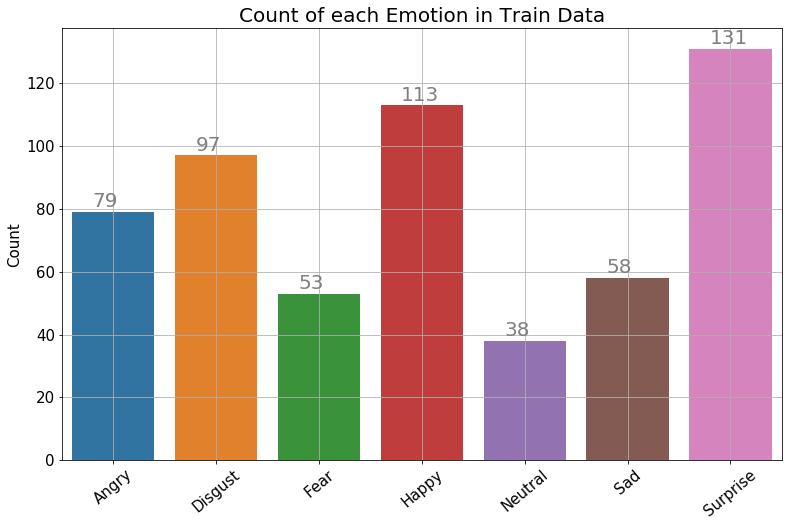

Number of training data points in class Surprise = 131(23.0228%)
Number of training data points in class Happy = 113(19.8594%)
Number of training data points in class Disgust = 97(17.0475%)
Number of training data points in class Angry = 79(13.884%)
Number of training data points in class Sad = 58(10.1933%)
Number of training data points in class Fear = 53(9.3146%)
Number of training data points in class Neutral = 38(6.6784%)
--------------------------------------------------------------------------------


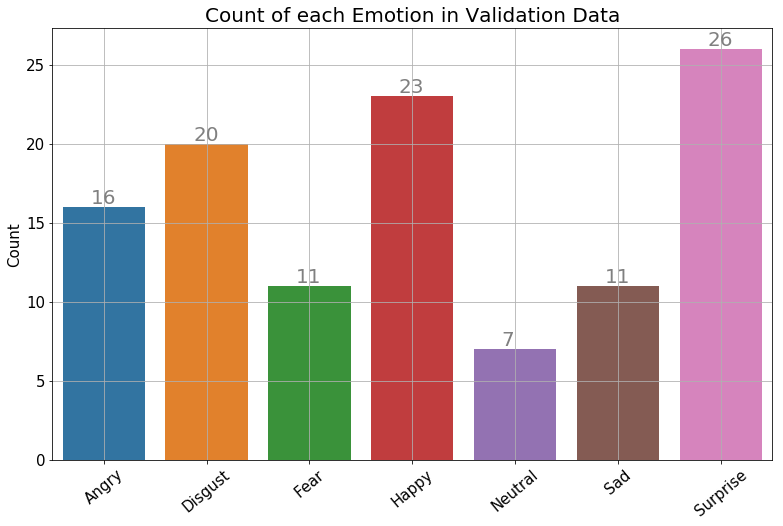

Number of training data points in class Surprise = 26(22.807%)
Number of training data points in class Happy = 23(20.1754%)
Number of training data points in class Disgust = 20(17.5439%)
Number of training data points in class Angry = 16(14.0351%)
Number of training data points in class Fear = 11(9.6491%)
Number of training data points in class Sad = 11(9.6491%)
Number of training data points in class Neutral = 7(6.1404%)
--------------------------------------------------------------------------------


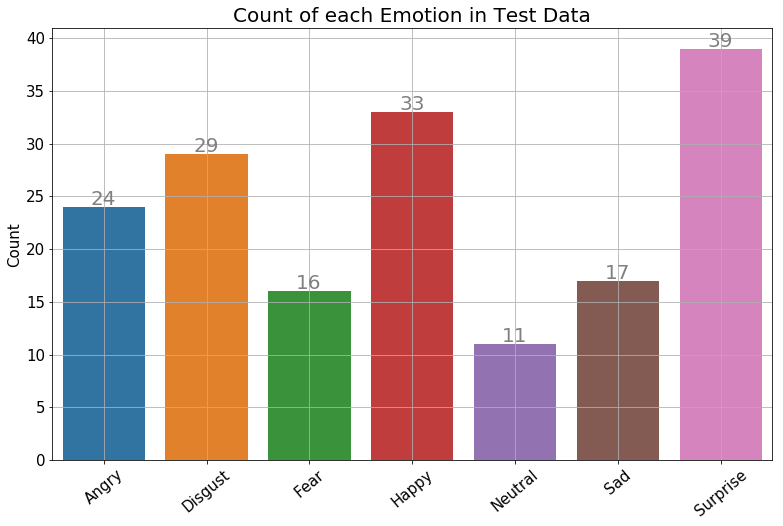

Number of training data points in class Surprise = 39(23.0769%)
Number of training data points in class Happy = 33(19.5266%)
Number of training data points in class Disgust = 29(17.1598%)
Number of training data points in class Angry = 24(14.2012%)
Number of training data points in class Sad = 17(10.0592%)
Number of training data points in class Fear = 16(9.4675%)
Number of training data points in class Neutral = 11(6.5089%)


In [35]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+1.5, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TrainData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_train.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_cv)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in CVData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_cv.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_test.shape[0])*100), 4))+"%)")

## 4. Pre-Processing Human Images

### 4.1 Converting all the images to grayscale and save them

In [36]:
def convt_to_gray(df):
    count = 0
    for i in range(len(df)):
        path1 = df["folderName"][i]
        path2 = df["imageName"][i]
        img = cv2.imread(os.path.join(path1, path2))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path1, path2), gray)
        count += 1
    print("Total number of images converted and saved = "+str(count))

In [37]:
convt_to_gray(df_human_train)

Total number of images converted and saved = 569


In [38]:
convt_to_gray(df_human_cv)

Total number of images converted and saved = 114


In [39]:
convt_to_gray(df_human_test)

Total number of images converted and saved = 169


### 4.2 Detecting face in image using HAAR then crop it then resize then save the image

In [40]:
#detect the face in image using HAAR cascade then crop it then resize it and finally save it.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
#download this xml file from link: https://github.com/opencv/opencv/tree/master/data/haarcascades.
def face_det_crop_resize(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if faces is not ():
        for (x,y,w,h) in faces:
            face_clip = img[y:y+h, x:x+w]  #cropping the face in image
            cv2.imwrite(img_path, cv2.resize(face_clip, (350, 350)))  #resizing image then saving it
    if faces is ():
        cv2.imwrite(img_path, cv2.resize(img, (350, 350)))

In [41]:
for i, d in df_human_train.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

In [42]:
for i, d in df_human_cv.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

In [43]:
for i, d in df_human_test.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

## 5. Reading the Data of Animated Images

### Angry

In [44]:
anime_angry = glob.glob("../Data/Animated/Angry/*.png")
print("Number of images in Angry emotion = "+str(len(anime_angry)))

Number of images in Angry emotion = 650


In [45]:
anime_angry_folderName = [str(i.split("\\")[0])+"/" for i in anime_angry]
anime_angry_imageName = [str(i.split("\\")[1]) for i in anime_angry]
anime_angry_emotion = [["Angry"]*len(anime_angry)][0]
anime_angry_label = [1]*len(anime_angry)

len(anime_angry_folderName), len(anime_angry_imageName), len(anime_angry_emotion), len(anime_angry_label)

(650, 650, 650, 650)

In [46]:
df_angry = pd.DataFrame()
df_angry["folderName"] = anime_angry_folderName
df_angry["imageName"] = anime_angry_imageName
df_angry["Emotion"] = anime_angry_emotion
df_angry["Labels"] = anime_angry_label
df_angry.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Angry/,aia_anger_10.png,Angry,1
1,../Data/Animated/Angry/,aia_anger_1002.png,Angry,1
2,../Data/Animated/Angry/,aia_anger_102.png,Angry,1
3,../Data/Animated/Angry/,aia_anger_1021.png,Angry,1
4,../Data/Animated/Angry/,aia_anger_1047.png,Angry,1


In [47]:
df_angry = df_angry.sample(frac = 1.0) #shuffling dataframe
df_angry_reduced = df_angry.sample(n = 650)  #taking only 1300 random images
df_angry_reduced.shape

(650, 4)

In [48]:
#removing all the extra images from storage
df_angry_reducedIndx = df_angry_reduced.index
count = 0
for i, d in df_angry.iterrows():
    if i not in df_angry_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Disgust

In [49]:
anime_disgust = glob.glob("../Data/Animated/Disgust/*.png")
print("Number of images in Disgust emotion = "+str(len(anime_disgust)))

Number of images in Disgust emotion = 650


In [50]:
anime_disgust_folderName = [str(i.split("\\")[0])+"/" for i in anime_disgust]
anime_disgust_imageName = [str(i.split("\\")[1]) for i in anime_disgust]
anime_disgust_emotion = [["Disgust"]*len(anime_disgust)][0]
anime_disgust_label = [2]*len(anime_disgust)

len(anime_disgust_folderName), len(anime_disgust_imageName), len(anime_disgust_emotion), len(anime_disgust_label)

(650, 650, 650, 650)

In [51]:
df_disgust = pd.DataFrame()
df_disgust["folderName"] = anime_disgust_folderName
df_disgust["imageName"] = anime_disgust_imageName
df_disgust["Emotion"] = anime_disgust_emotion
df_disgust["Labels"] = anime_disgust_label
df_disgust.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Disgust/,aia_disgust_10.png,Disgust,2
1,../Data/Animated/Disgust/,aia_disgust_118.png,Disgust,2
2,../Data/Animated/Disgust/,aia_disgust_120.png,Disgust,2
3,../Data/Animated/Disgust/,aia_disgust_138.png,Disgust,2
4,../Data/Animated/Disgust/,aia_disgust_162.png,Disgust,2


In [52]:
df_disgust = df_disgust.sample(frac = 1.0) #shuffling dataframe
df_disgust_reduced = df_disgust.sample(n = 650)  #taking only 1300 random images
df_disgust_reduced.shape

(650, 4)

In [53]:
#removing all the extra images from storage
df_disgust_reducedIndx = df_disgust_reduced.index
count = 0
for i, d in df_disgust.iterrows():
    if i not in df_disgust_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Fear

In [54]:
anime_fear = glob.glob("../Data/Animated/Fear/*.png")
print("Number of images in Fear emotion = "+str(len(anime_fear)))

Number of images in Fear emotion = 650


In [55]:
anime_fear_folderName = [str(i.split("\\")[0])+"/" for i in anime_fear]
anime_fear_imageName = [str(i.split("\\")[1]) for i in anime_fear]
anime_fear_emotion = [["Fear"]*len(anime_fear)][0]
anime_fear_label = [3]*len(anime_fear)

len(anime_fear_folderName), len(anime_fear_imageName), len(anime_fear_emotion), len(anime_fear_label)

(650, 650, 650, 650)

In [56]:
df_fear = pd.DataFrame()
df_fear["folderName"] = anime_fear_folderName
df_fear["imageName"] = anime_fear_imageName
df_fear["Emotion"] = anime_fear_emotion
df_fear["Labels"] = anime_fear_label
df_fear.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Fear/,aia_fear_1019.png,Fear,3
1,../Data/Animated/Fear/,aia_fear_1052.png,Fear,3
2,../Data/Animated/Fear/,aia_fear_1069.png,Fear,3
3,../Data/Animated/Fear/,aia_fear_1085.png,Fear,3
4,../Data/Animated/Fear/,aia_fear_1109.png,Fear,3


In [57]:
df_fear = df_fear.sample(frac = 1.0) #shuffling dataframe
df_fear_reduced = df_fear.sample(n = 650)  #taking only 1300 random images
df_fear_reduced.shape

(650, 4)

In [58]:
#removing all the extra images from storage
df_fear_reducedIndx = df_fear_reduced.index
count = 0
for i, d in df_fear.iterrows():
    if i not in df_fear_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Happy

In [59]:
anime_happy = glob.glob("../Data/Animated/Happy/*.png")
print("Number of images in Happy emotion = "+str(len(anime_happy)))

Number of images in Happy emotion = 650


In [60]:
anime_happy_folderName = [str(i.split("\\")[0])+"/" for i in anime_happy]
anime_happy_imageName = [str(i.split("\\")[1]) for i in anime_happy]
anime_happy_emotion = [["Happy"]*len(anime_happy)][0]
anime_happy_label = [4]*len(anime_happy)

len(anime_happy_folderName), len(anime_happy_imageName), len(anime_happy_emotion), len(anime_happy_label)

(650, 650, 650, 650)

In [61]:
df_happy = pd.DataFrame()
df_happy["folderName"] = anime_happy_folderName
df_happy["imageName"] = anime_happy_imageName
df_happy["Emotion"] = anime_happy_emotion
df_happy["Labels"] = anime_happy_label
df_happy.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Happy/,(1006).png,Happy,4
1,../Data/Animated/Happy/,(1008).png,Happy,4
2,../Data/Animated/Happy/,(1013).png,Happy,4
3,../Data/Animated/Happy/,(1028).png,Happy,4
4,../Data/Animated/Happy/,(1029).png,Happy,4


In [62]:
df_happy = df_happy.sample(frac = 1.0) #shuffling dataframe
df_happy_reduced = df_happy.sample(n = 650)  #taking only 1300 random images
df_happy_reduced.shape

(650, 4)

In [63]:
#removing all the extra images from storage
df_happy_reducedIndx = df_happy_reduced.index
count = 0
for i, d in df_happy.iterrows():
    if i not in df_happy_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Neutral

In [64]:
anime_neutral = glob.glob("../Data/Animated/Neutral/*.png")
print("Number of images in Neutral emotion = "+str(len(anime_neutral)))

Number of images in Neutral emotion = 650


In [65]:
anime_neutral_folderName = [str(i.split("\\")[0])+"/" for i in anime_neutral]
anime_neutral_imageName = [str(i.split("\\")[1]) for i in anime_neutral]
anime_neutral_emotion = [["Neutral"]*len(anime_neutral)][0]
anime_neutral_label = [5]*len(anime_neutral)

len(anime_neutral_folderName), len(anime_neutral_imageName), len(anime_neutral_emotion), len(anime_neutral_label)

(650, 650, 650, 650)

In [66]:
df_neutral = pd.DataFrame()
df_neutral["folderName"] = anime_neutral_folderName
df_neutral["imageName"] = anime_neutral_imageName
df_neutral["Emotion"] = anime_neutral_emotion
df_neutral["Labels"] = anime_neutral_label
df_neutral.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Neutral/,aia_neutral_100.png,Neutral,5
1,../Data/Animated/Neutral/,aia_neutral_1024.png,Neutral,5
2,../Data/Animated/Neutral/,aia_neutral_1027.png,Neutral,5
3,../Data/Animated/Neutral/,aia_neutral_1028.png,Neutral,5
4,../Data/Animated/Neutral/,aia_neutral_103.png,Neutral,5


In [67]:
df_neutral = df_neutral.sample(frac = 1.0) #shuffling dataframe
df_neutral_reduced = df_neutral.sample(n =650)  #taking only 1300 random images
df_neutral_reduced.shape

(650, 4)

In [68]:
#removing all the extra images from storage
df_neutral_reducedIndx = df_neutral_reduced.index
count = 0
for i, d in df_neutral.iterrows():
    if i not in df_neutral_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Sad

In [69]:
anime_sad = glob.glob("../Data/Animated/Sad/*.png")
print("Number of images in Sad emotion = "+str(len(anime_sad)))

Number of images in Sad emotion = 650


In [70]:
anime_sad_folderName = [str(i.split("\\")[0])+"/" for i in anime_sad]
anime_sad_imageName = [str(i.split("\\")[1]) for i in anime_sad]
anime_sad_emotion = [["Sad"]*len(anime_sad)][0]
anime_sad_label = [6]*len(anime_sad)

len(anime_sad_folderName), len(anime_sad_imageName), len(anime_sad_emotion), len(anime_sad_label)

(650, 650, 650, 650)

In [71]:
df_sad = pd.DataFrame()
df_sad["folderName"] = anime_sad_folderName
df_sad["imageName"] = anime_sad_imageName
df_sad["Emotion"] = anime_sad_emotion
df_sad["Labels"] = anime_sad_label
df_sad.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Sad/,aia_sadness_1010.png,Sad,6
1,../Data/Animated/Sad/,aia_sadness_1012.png,Sad,6
2,../Data/Animated/Sad/,aia_sadness_1021.png,Sad,6
3,../Data/Animated/Sad/,aia_sadness_1026.png,Sad,6
4,../Data/Animated/Sad/,aia_sadness_103.png,Sad,6


In [72]:
df_sad = df_sad.sample(frac = 1.0) #shuffling dataframe
df_sad_reduced = df_sad.sample(n = 650)  #taking only 1300 random images
df_sad_reduced.shape

(650, 4)

In [73]:
#removing all the extra images from storage
df_sad_reducedIndx = df_sad_reduced.index
count = 0
for i, d in df_sad.iterrows():
    if i not in df_sad_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Surprise

In [74]:
anime_surprise = glob.glob("../Data/Animated/Surprise/*.png")
print("Number of images in Surprise emotion = "+str(len(anime_surprise)))

Number of images in Surprise emotion = 650


In [75]:
anime_surprise_folderName = [str(i.split("\\")[0])+"/" for i in anime_surprise]
anime_surprise_imageName = [str(i.split("\\")[1]) for i in anime_surprise]
anime_surprise_emotion = [["Surprise"]*len(anime_surprise)][0]
anime_surprise_label = [7]*len(anime_surprise)

len(anime_surprise_folderName), len(anime_surprise_imageName), len(anime_surprise_emotion), len(anime_surprise_label)

(650, 650, 650, 650)

In [76]:
df_surprise = pd.DataFrame()
df_surprise["folderName"] = anime_surprise_folderName
df_surprise["imageName"] = anime_surprise_imageName
df_surprise["Emotion"] = anime_surprise_emotion
df_surprise["Labels"] = anime_surprise_label
df_surprise.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Surprise/,aia_surprise_100.png,Surprise,7
1,../Data/Animated/Surprise/,aia_surprise_1021.png,Surprise,7
2,../Data/Animated/Surprise/,aia_surprise_1023.png,Surprise,7
3,../Data/Animated/Surprise/,aia_surprise_1026.png,Surprise,7
4,../Data/Animated/Surprise/,aia_surprise_1027.png,Surprise,7


In [77]:
df_surprise = df_surprise.sample(frac = 1.0) #shuffling dataframe
df_surprise_reduced = df_surprise.sample(n = 650)  #taking only 1300 random images
df_surprise_reduced.shape

(650, 4)

In [78]:
#removing all the extra images from storage
df_surprise_reducedIndx = df_surprise_reduced.index
count = 0
for i, d in df_surprise.iterrows():
    if i not in df_surprise_reducedIndx:
        os.remove(os.path.join(d["folderName"], d["imageName"]))
        count += 1
print("Total number of images removed = "+str(count))

Total number of images removed = 0


### Concatenating all Datafames

In [79]:
frames = [df_angry_reduced, df_disgust_reduced, df_fear_reduced, df_happy_reduced, df_neutral_reduced, df_sad_reduced, df_surprise_reduced]
Final_Animated = pd.concat(frames)
Final_Animated.shape

(4550, 4)

In [80]:
Final_Animated.reset_index(inplace = True, drop = True)
Final_Animated = Final_Animated.sample(frac = 1.0)   #shuffling the dataframe
Final_Animated.reset_index(inplace = True, drop = True)
Final_Animated.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Happy/,ray_joy_383.png,Happy,4
1,../Data/Animated/Happy/,aia_joy_817.png,Happy,4
2,../Data/Animated/Neutral/,jules_neutral_60.png,Neutral,5
3,../Data/Animated/Disgust/,ray_disgust_394.png,Disgust,2
4,../Data/Animated/Angry/,bonnie_anger_1770.png,Angry,1


## 6. Train, CV and Test Split for Animated Images

In [81]:
df_anime_train_data, df_anime_test = train_test_split(Final_Animated, stratify=Final_Animated["Labels"], test_size = 0.131868)
df_anime_train, df_anime_cv = train_test_split(df_anime_train_data, stratify=df_anime_train_data["Labels"], test_size = 0.088607)
df_anime_train.shape, df_anime_cv.shape, df_anime_test.shape

((3600, 4), (350, 4), (600, 4))

In [82]:
df_anime_train.reset_index(inplace = True, drop = True)
df_anime_train.to_pickle("../Data/Dataframes/Animated/df_anime_train.pkl")

df_anime_cv.reset_index(inplace = True, drop = True)
df_anime_cv.to_pickle("../Data/Dataframes/Animated/df_anime_cv.pkl")

df_anime_test.reset_index(inplace = True, drop = True)
df_anime_test.to_pickle("../Data/Dataframes/Animated/df_anime_test.pkl")

In [83]:
df_anime_train = pd.read_pickle("../Data/Dataframes/Animated/df_anime_train.pkl")
df_anime_train.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Neutral/,aia_neutral_158.png,Neutral,5
1,../Data/Animated/Angry/,mery_anger_462.png,Angry,1
2,../Data/Animated/Angry/,aia_anger_1108.png,Angry,1
3,../Data/Animated/Neutral/,bonnie_neutral_1019.png,Neutral,5
4,../Data/Animated/Fear/,mery_fear_354.png,Fear,3


In [84]:
df_anime_train.shape

(3600, 4)

In [85]:
df_anime_cv = pd.read_pickle("../Data/Dataframes/Animated/df_anime_cv.pkl")
df_anime_cv.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Disgust/,bonnie_disgust_206.png,Disgust,2
1,../Data/Animated/Sad/,jules_sadness_1089.png,Sad,6
2,../Data/Animated/Happy/,aia_joy_911.png,Happy,4
3,../Data/Animated/Disgust/,jules_disgust_97.png,Disgust,2
4,../Data/Animated/Surprise/,jules_surprise_721.png,Surprise,7


In [86]:
df_anime_cv.shape

(350, 4)

In [87]:
df_anime_test = pd.read_pickle("../Data/Dataframes/Animated/df_anime_test.pkl")
df_anime_test.head()

,folderName,imageName,Emotion,Labels
0,../Data/Animated/Disgust/,bonnie_disgust_176.png,Disgust,2
1,../Data/Animated/Surprise/,aia_surprise_550.png,Surprise,7
2,../Data/Animated/Neutral/,aia_neutral_813.png,Neutral,5
3,../Data/Animated/Neutral/,mery_neutral_71.png,Neutral,5
4,../Data/Animated/Angry/,jules_anger_220.png,Angry,1


In [88]:
df_anime_test.shape

(600, 4)

## 7. Analysing Data of Animated Images
### Distribution of class labels in Train, CV and Test

In [89]:
df_temp_train = df_anime_train.sort_values(by = "Labels", inplace = False)
df_temp_cv = df_anime_cv.sort_values(by = "Labels", inplace = False)
df_temp_test = df_anime_test.sort_values(by = "Labels", inplace = False)

TrainData_distribution = df_anime_train["Emotion"].value_counts().sort_index()
CVData_distribution = df_anime_cv["Emotion"].value_counts().sort_index()
TestData_distribution = df_anime_test["Emotion"].value_counts().sort_index()

TrainData_distribution_sorted = sorted(TrainData_distribution.items(), key = lambda d: d[1], reverse = True)
CVData_distribution_sorted = sorted(CVData_distribution.items(), key = lambda d: d[1], reverse = True)
TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)

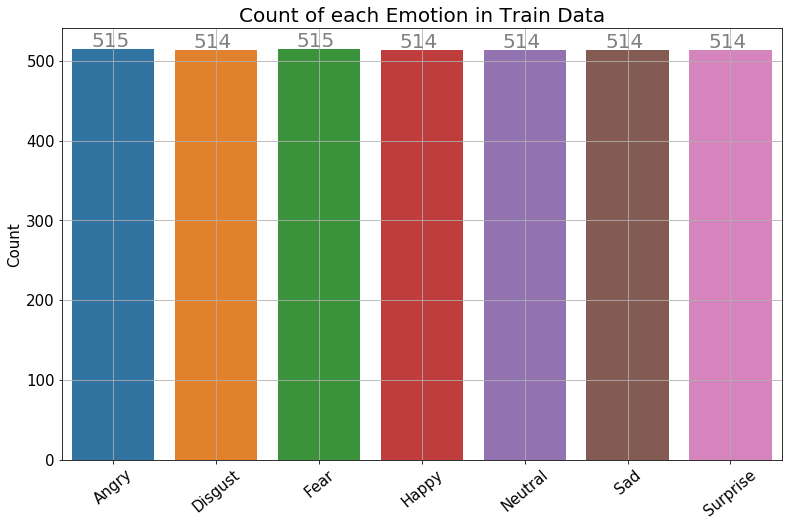

Number of training data points in class Angry = 515(14.3056%)
Number of training data points in class Fear = 515(14.3056%)
Number of training data points in class Disgust = 514(14.2778%)
Number of training data points in class Happy = 514(14.2778%)
Number of training data points in class Neutral = 514(14.2778%)
Number of training data points in class Sad = 514(14.2778%)
Number of training data points in class Surprise = 514(14.2778%)
--------------------------------------------------------------------------------


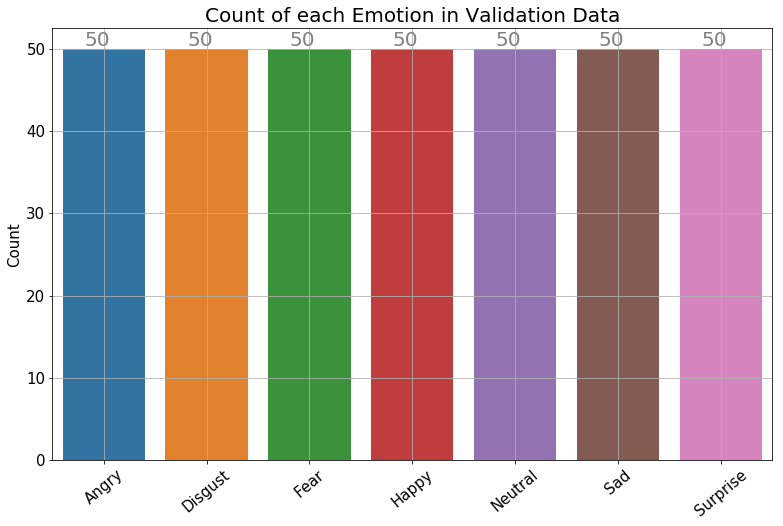

Number of training data points in class Angry = 50(14.2857%)
Number of training data points in class Disgust = 50(14.2857%)
Number of training data points in class Fear = 50(14.2857%)
Number of training data points in class Happy = 50(14.2857%)
Number of training data points in class Neutral = 50(14.2857%)
Number of training data points in class Sad = 50(14.2857%)
Number of training data points in class Surprise = 50(14.2857%)
--------------------------------------------------------------------------------


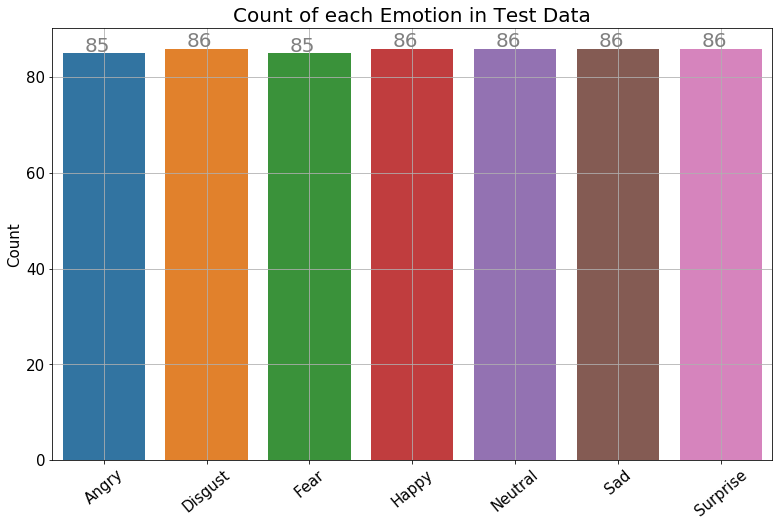

Number of training data points in class Disgust = 86(14.3333%)
Number of training data points in class Happy = 86(14.3333%)
Number of training data points in class Neutral = 86(14.3333%)
Number of training data points in class Sad = 86(14.3333%)
Number of training data points in class Surprise = 86(14.3333%)
Number of training data points in class Angry = 85(14.1667%)
Number of training data points in class Fear = 85(14.1667%)


In [90]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Train Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_train)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.185, y = i.get_height()+1.6, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TrainData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_train.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Validation Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_cv)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.21, y = i.get_height()+0.3, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in CVData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_cv.shape[0])*100), 4))+"%)")

print("-"*80)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = df_temp_test)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.21, y = i.get_height()+0.3, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/df_temp_test.shape[0])*100), 4))+"%)")

## 8. Pre-Processing Animated Images

### 8.1 Converting all the images to grayscale and save them

In [91]:
def convt_to_gray(df):
    count = 0
    for i in range(len(df)):
        path1 = df["folderName"][i]
        path2 = df["imageName"][i]
        img = cv2.imread(os.path.join(path1, path2))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        cv2.imwrite(os.path.join(path1, path2), gray)
        count += 1
    print("Total number of images converted and saved = "+str(count))

In [92]:
# convt_to_gray(df_anime_train)

In [93]:
# convt_to_gray(df_anime_cv)

In [94]:
# convt_to_gray(df_anime_test)

### 8.2 Crop the image then resize them then save them.

In [95]:
def change_image(df):
    count = 0
    for i, d in df.iterrows():
        img = cv2.imread(os.path.join(d["folderName"], d["imageName"]))
        face_clip = img[40:240, 35:225]         #cropping the face in image
        face_resized = cv2.resize(face_clip, (350, 350))
        cv2.imwrite(os.path.join(d["folderName"], d["imageName"]), face_resized) #resizing and saving the image
        count += 1
    print("Total number of images cropped and resized = {}".format(count))

In [96]:
# change_image(df_anime_train)

In [97]:
# change_image(df_anime_cv)

In [98]:
# change_image(df_anime_test)

## 9. Combining train data of both Animated and Human images

Remember, that here we have combined only the train images of both human and animated so that we can train our model on both human and animated images. However, we have kept CV and test images of both human and animated separate so that we can cross validation our results on both human and animated images separately. At the same time we will also be able to test the efficiency of our model separately on human and animated images. By this we will get to know that how well our model is performing on human and animated images separately.

In [99]:
frames = [df_human_train, df_anime_train]
combined_train = pd.concat(frames)
combined_train.shape

(4169, 4)

In [100]:
combined_train = combined_train.sample(frac = 1.0)  #shuffling the dataframe
combined_train.reset_index(inplace = True, drop = True)
combined_train.to_pickle("../Data/Dataframes/combined_train.pkl")

## 10. Creating bottleneck features from VGG-16 model. Here, we are using Transfer learning.

In [134]:
Train_Combined = pd.read_pickle("../Data/Dataframes/combined_train.pkl")
CV_Humans = pd.read_pickle("../Data/Dataframes/Human/df_human_cv.pkl")
CV_Animated = pd.read_pickle("../Data/Dataframes/Animated/df_anime_cv.pkl")
Test_Humans = pd.read_pickle("../Data/Dataframes/Human/df_human_test.pkl")
Test_Animated = pd.read_pickle("../Data/Dataframes/Animated/df_anime_test.pkl")

Train_Combined.shape, CV_Humans.shape, CV_Animated.shape, Test_Humans.shape, Test_Animated.shape

((4169, 4), (114, 4), (350, 4), (169, 4), (600, 4))

In [135]:
TrainCombined_batch_pointer = 0
CVHumans_batch_pointer = 0
CVAnimated_batch_pointer = 0
TestHumans_batch_pointer = 0
TestAnimated_batch_pointer = 0

### 10.1 Bottleneck features for CombinedTrain Data

In [136]:
TrainCombined_Labels = pd.get_dummies(Train_Combined["Labels"]).as_matrix()
TrainCombined_Labels.shape

C:\Users\xsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(4169, 7)

In [137]:
# read_image = cv2.imread("../Data/Human/Happy/S070_003_00000017.png")
# print(read_image/255.0)

In [138]:
# print(Train_Combined.iloc[3270 + 327])

In [139]:
def loadCombinedTrainBatch(batch_size):
    global TrainCombined_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["folderName"]
        path2 = Train_Combined.iloc[TrainCombined_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
#         print(read_image_final.shape)
        batch_images.append(read_image_final)
        
        batch_labels.append(TrainCombined_Labels[TrainCombined_batch_pointer + i]) #appending corresponding labels
        
    TrainCombined_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [140]:
#creating bottleneck features for train data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"
batch_size = 100
for i in range(int(len(Train_Combined)/batch_size)):
    x, y = loadCombinedTrainBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
#     print(x.shape)
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved

Batch 7 loaded
Creating bottleneck features for batch 7
Bottleneck features for batch 7 created and saved

Batch 8 loaded
Creating bottleneck features for batch 8
Bottleneck features for batch 8 created and saved

Batch 9 loaded
Creating bottleneck features for batch 9
Bottleneck features for batch 9 created and saved

Batch 10 loaded
Creating bottleneck f

### 10.2 Bottleneck features for CV Human

In [141]:
CVHumans_Labels = pd.get_dummies(CV_Humans["Labels"]).as_matrix()
CVHumans_Labels.shape

C:\Users\xsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(114, 7)

In [142]:
CVHumans_batch_pointer = 0
CVAnimated_batch_pointer = 0
TestHumans_batch_pointer = 0
TestAnimated_batch_pointer = 0

In [143]:
def loadCVHumanBatch(batch_size):
    global CVHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = CV_Humans.iloc[CVHumans_batch_pointer + i]["folderName"]
        path2 = CV_Humans.iloc[CVHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(CVHumans_Labels[CVHumans_batch_pointer + i]) #appending corresponding labels
        
    CVHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [144]:
# creating bottleneck features for CV Human data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CVHumans_Labels/"
batch_size = 100
for i in range(int(len(CV_Humans)/batch_size)):
    x, y = loadCVHumanBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved



### 10.3 Bottleneck features for CV Animated

In [145]:
CVAnimated_Labels = pd.get_dummies(CV_Animated["Labels"]).as_matrix()
CVAnimated_Labels.shape

C:\Users\xsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(350, 7)

In [146]:
CVAnimated_batch_pointer = 0
TestHumans_batch_pointer = 0
TestAnimated_batch_pointer = 0

In [147]:
def loadCVAnimatedBatch(batch_size):
    global CVAnimated_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = CV_Animated.iloc[CVAnimated_batch_pointer + i]["folderName"]
        path2 = CV_Animated.iloc[CVAnimated_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(CVAnimated_Labels[CVAnimated_batch_pointer + i]) #appending corresponding labels
        
    CVAnimated_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [148]:
#creating bottleneck features for CV Animated data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_CVAnimated/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/CVAnimated_Labels/"
batch_size = 100
for i in range(int(len(CV_Animated)/batch_size)):
    x, y = loadCVAnimatedBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved



### 10.4 Bottleneck Features for Test Human Data

In [149]:
TestHuman_Labels = pd.get_dummies(Test_Humans["Labels"]).as_matrix()
TestHuman_Labels.shape

C:\Users\xsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(169, 7)

In [150]:
TestHumans_batch_pointer = 0
TestAnimated_batch_pointer = 0

In [151]:
def loadTestHumansBatch(batch_size):
    global TestHumans_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Test_Humans.iloc[TestHumans_batch_pointer + i]["folderName"]
        path2 = Test_Humans.iloc[TestHumans_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TestHuman_Labels[TestHumans_batch_pointer + i]) #appending corresponding labels
        
    TestHumans_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [152]:
#creating bottleneck features for Test Humans data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_TestHumans/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/TestHumans_Labels/"
batch_size = 100
for i in range(int(len(Test_Humans)/batch_size)):
    x, y = loadTestHumansBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

leftover_points = len(Test_Humans) - TestHumans_batch_pointer
x, y = loadTestHumansBatch(leftover_points)
np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(int(len(Test_Humans)/batch_size) + 1)), y)
bottleneck_features = model.predict(x)
np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(int(len(Test_Humans)/batch_size) + 1)), bottleneck_features)

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved



### 10.5 Bottleneck Features for Test Animated Data

In [157]:
TestAnimated_Labels = pd.get_dummies(Test_Animated["Labels"]).as_matrix()
TestAnimated_Labels.shape

C:\Users\xsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(600, 7)

In [158]:
TestAnimated_batch_pointer = 0

In [159]:
def loadTestAnimatedBatch(batch_size):
    global TestAnimated_batch_pointer
    batch_images = []
    batch_labels = []
    for i in range(batch_size):
        path1 = Test_Animated.iloc[TestAnimated_batch_pointer + i]["folderName"]
        path2 = Test_Animated.iloc[TestAnimated_batch_pointer + i]["imageName"]
        read_image = cv2.imread(os.path.join(path1, path2))
        read_image_final = read_image/255.0  #here, we are normalizing the images
        batch_images.append(read_image_final)
        
        batch_labels.append(TestAnimated_Labels[TestAnimated_batch_pointer + i]) #appending corresponding labels
        
    TestAnimated_batch_pointer += batch_size
        
    return np.array(batch_images), np.array(batch_labels)

In [160]:
#creating bottleneck features for Test Animated data using VGG-16- Image-net model
model = VGG16(weights='imagenet', include_top=False)
SAVEDIR = "../Data/Bottleneck_Features/Bottleneck_TestAnimated/"
SAVEDIR_LABELS = "../Data/Bottleneck_Features/TestAnimated_Labels/"
batch_size = 100
for i in range(int(len(Test_Animated)/batch_size)):
    x, y = loadTestAnimatedBatch(batch_size)
    print("Batch {} loaded".format(i+1))
    
    np.save(os.path.join(SAVEDIR_LABELS, "bottleneck_labels_{}".format(i+1)), y)
    
    print("Creating bottleneck features for batch {}". format(i+1))
    bottleneck_features = model.predict(x)
    np.save(os.path.join(SAVEDIR, "bottleneck_{}".format(i+1)), bottleneck_features)
    print("Bottleneck features for batch {} created and saved\n".format(i+1))

Batch 1 loaded
Creating bottleneck features for batch 1
Bottleneck features for batch 1 created and saved

Batch 2 loaded
Creating bottleneck features for batch 2
Bottleneck features for batch 2 created and saved

Batch 3 loaded
Creating bottleneck features for batch 3
Bottleneck features for batch 3 created and saved

Batch 4 loaded
Creating bottleneck features for batch 4
Bottleneck features for batch 4 created and saved

Batch 5 loaded
Creating bottleneck features for batch 5
Bottleneck features for batch 5 created and saved

Batch 6 loaded
Creating bottleneck features for batch 6
Bottleneck features for batch 6 created and saved



## 11. Modelling & Training

In [161]:
no_of_classes = 7

In [162]:
#model architecture
def model(input_shape):
    model = Sequential()
        
    model.add(Dense(512, activation='relu', input_dim = input_shape))
    model.add(Dropout(0.1))
    
    model.add(Dense(256, activation='relu'))
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    
    model.add(Dense(64, activation='relu'))
    model.add(Dense(output_dim = no_of_classes, activation='softmax')) 
    
    return model

In [163]:
#training the model
SAVEDIR_COMB_TRAIN = "../Data/Bottleneck_Features/Bottleneck_CombinedTrain/"
SAVEDIR_COMB_TRAIN_LABELS = "../Data/Bottleneck_Features/CombinedTrain_Labels/"

SAVEDIR_CV_HUMANS = "../Data/Bottleneck_Features/Bottleneck_CVHumans/"
SAVEDIR_CV_HUMANS_LABELS = "../Data/Bottleneck_Features/CVHumans_Labels/"

SAVEDIR_CV_ANIME = "../Data/Bottleneck_Features/Bottleneck_CVAnimated/"
SAVEDIR_CV_ANIME_LABELS =  "../Data/Bottleneck_Features/CVAnimated_Labels/"

SAVER = "../Data/Model_Save/"

input_shape = 10*10*512   #this is the shape of bottleneck feature of each image which comes after passing the image through VGG-16

model = model(input_shape)
# model.load_weights(os.path.join(SAVER, "model.h5"))
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ["accuracy"])

epochs = 20
batch_size = 100
step = 0
combTrain_bottleneck_files = int(len(Train_Combined) / batch_size)
CVHuman_bottleneck_files = int(len(CV_Humans) / batch_size)
CVAnime_bottleneck_files = int(len(CV_Animated) / batch_size)
epoch_number, CombTrain_loss, CombTrain_acc, CVHuman_loss, CVHuman_acc, CVAnime_loss, CVAnime_acc = [], [], [], [], [], [], []

for epoch in range(epochs):
    avg_epoch_CombTr_loss, avg_epoch_CombTr_acc, avg_epoch_CVHum_loss, avg_epoch_CVHum_acc, avg_epoch_CVAnime_loss, avg_epoch_CVAnime_acc = 0, 0, 0, 0, 0, 0
    epoch_number.append(epoch + 1)
    
    for i in range(combTrain_bottleneck_files):
        
        step += 1
        
        #loading batch of train bottleneck features for training MLP.
        X_CombTrain_load = np.load(os.path.join(SAVEDIR_COMB_TRAIN, "bottleneck_{}.npy".format(i+1)))
        X_CombTrain = X_CombTrain_load.reshape(X_CombTrain_load.shape[0], X_CombTrain_load.shape[1]*X_CombTrain_load.shape[2]*X_CombTrain_load.shape[3])
        Y_CombTrain = np.load(os.path.join(SAVEDIR_COMB_TRAIN_LABELS, "bottleneck_labels_{}.npy".format(i+1)))
#         print(X_CombTrain.shape,Y_CombTrain.shape)
        #loading batch of Human CV bottleneck features for cross-validation.
        X_CVHuman_load = np.load(os.path.join(SAVEDIR_CV_HUMANS, "bottleneck_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        X_CVHuman = X_CVHuman_load.reshape(X_CVHuman_load.shape[0], X_CVHuman_load.shape[1]*X_CVHuman_load.shape[2]*X_CVHuman_load.shape[3])
        Y_CVHuman = np.load(os.path.join(SAVEDIR_CV_HUMANS_LABELS, "bottleneck_labels_{}.npy".format((i % CVHuman_bottleneck_files) + 1)))
        
        #loading batch of animated CV bottleneck features for cross-validation.
        X_CVAnime_load = np.load(os.path.join(SAVEDIR_CV_ANIME, "bottleneck_{}.npy".format((i % CVAnime_bottleneck_files) + 1)))
        X_CVAnime = X_CVAnime_load.reshape(X_CVAnime_load.shape[0], X_CVAnime_load.shape[1]*X_CVAnime_load.shape[2]*X_CVAnime_load.shape[3])
        Y_CVAnime = np.load(os.path.join(SAVEDIR_CV_ANIME_LABELS, "bottleneck_labels_{}.npy".format((i % CVAnime_bottleneck_files) + 1)))
        
        CombTrain_Loss, CombTrain_Accuracy = model.train_on_batch(X_CombTrain, Y_CombTrain) #train the model on batch
        CVHuman_Loss, CVHuman_Accuracy = model.test_on_batch(X_CVHuman, Y_CVHuman) #cross validate the model on CV Human batch
        CVAnime_Loss, CVAnime_Accuracy = model.test_on_batch(X_CVAnime, Y_CVAnime) #cross validate the model on CV Animated batch
        
#         print("Epoch: {}, Step: {}, CombTr_Loss: {}, CombTr_Acc: {}, CVHum_Loss: {}, CVHum_Acc: {}, CVAni_Loss: {}, CVAni_Acc: {}".format(epoch+1, step, np.round(float(CombTrain_Loss), 2), np.round(float(CombTrain_Accuracy), 2), np.round(float(CVHuman_Loss), 2), np.round(float(CVHuman_Accuracy), 2), np.round(float(CVAnime_Loss), 2), np.round(float(CVAnime_Accuracy), 2)))
        
        avg_epoch_CombTr_loss += CombTrain_Loss / combTrain_bottleneck_files
        avg_epoch_CombTr_acc += CombTrain_Accuracy / combTrain_bottleneck_files
        avg_epoch_CVHum_loss += CVHuman_Loss / combTrain_bottleneck_files
        avg_epoch_CVHum_acc += CVHuman_Accuracy / combTrain_bottleneck_files
        avg_epoch_CVAnime_loss += CVAnime_Loss / combTrain_bottleneck_files
        avg_epoch_CVAnime_acc += CVAnime_Accuracy / combTrain_bottleneck_files
        
    print("Avg_CombTrain_Loss: {}, Avg_CombTrain_Acc: {}, Avg_CVHum_Loss: {}, Avg_CVHum_Acc: {}, Avg_CVAnime_Loss: {}, Avg_CVAnime_Acc: {}".format(np.round(float(avg_epoch_CombTr_loss), 2), np.round(float(avg_epoch_CombTr_acc), 2), np.round(float(avg_epoch_CVHum_loss), 2), np.round(float(avg_epoch_CVHum_acc), 2), np.round(float(avg_epoch_CVAnime_loss), 2), np.round(float(avg_epoch_CVAnime_acc), 2)))

    CombTrain_loss.append(avg_epoch_CombTr_loss)
    CombTrain_acc.append(avg_epoch_CombTr_acc)
    CVHuman_loss.append(avg_epoch_CVHum_loss)
    CVHuman_acc.append(avg_epoch_CVHum_acc)
    CVAnime_loss.append(avg_epoch_CVAnime_loss)
    CVAnime_acc.append(avg_epoch_CVAnime_acc)
    
    model.save(os.path.join(SAVER, "model.h5"))  #saving the model on each epoc
    model.save_weights(os.path.join(SAVER, "model_weights.h5")) #saving the weights of model on each epoch
    print("Model and weights saved at epoch {}".format(epoch + 1))
          
log_frame = pd.DataFrame(columns = ["Epoch", "Comb_Train_Loss", "Comb_Train_Accuracy", "CVHuman_Loss", "CVHuman_Accuracy", "CVAnime_Loss", "CVAnime_Accuracy"])
log_frame["Epoch"] = epoch_number
log_frame["Comb_Train_Loss"] = CombTrain_loss
log_frame["Comb_Train_Accuracy"] = CombTrain_acc
log_frame["CVHuman_Loss"] = CVHuman_loss
log_frame["CVHuman_Accuracy"] = CVHuman_acc
log_frame["CVAnime_Loss"] = CVAnime_loss
log_frame["CVAnime_Accuracy"] = CVAnime_acc
log_frame.to_csv("../Data/Logs/Log.csv", index = False)

C:\Users\xsy\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=7)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
batch_normalization_2 (Batch (None, 128)               512       
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 455       
Total para

In [164]:
log = pd.read_csv("../Data/Logs/Loggood_job0.75-0.85_618.csv")
log

,Epoch,Comb_Train_Loss,Comb_Train_Accuracy,CVHuman_Loss,CVHuman_Accuracy,CVAnime_Loss,CVAnime_Accuracy
0,1,0.704710,0.755769,1.739470,0.448077,1.075818,0.708173
1,2,0.211229,0.934375,1.985411,0.547837,1.056886,0.805288
2,3,0.120556,0.962500,1.157691,0.705769,0.321500,0.893269
3,4,0.091546,0.971154,1.084601,0.711779,0.212145,0.934135
4,5,0.147811,0.950481,2.246476,0.647837,1.466243,0.834615
5,6,0.062828,0.976442,1.001590,0.740144,0.092428,0.969952
6,7,0.111092,0.963221,1.576609,0.689423,0.801960,0.863942
7,8,0.092735,0.971394,1.417509,0.682933,0.380458,0.889423
8,9,0.136161,0.956490,1.487133,0.668990,0.675563,0.859615
9,10,0.108349,0.968750,1.089068,0.737019,0.445498,0.918510


In [128]:
def plotting(epoch, train_loss, CVHuman_loss, CVAnimated_loss, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_loss, color = 'red', label = "Train")
    axes.plot(epoch, CVHuman_loss, color = 'blue', label = "CV_Human")
    axes.plot(epoch, CVAnimated_loss, color = 'green', label = "CV_Animated")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Loss", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

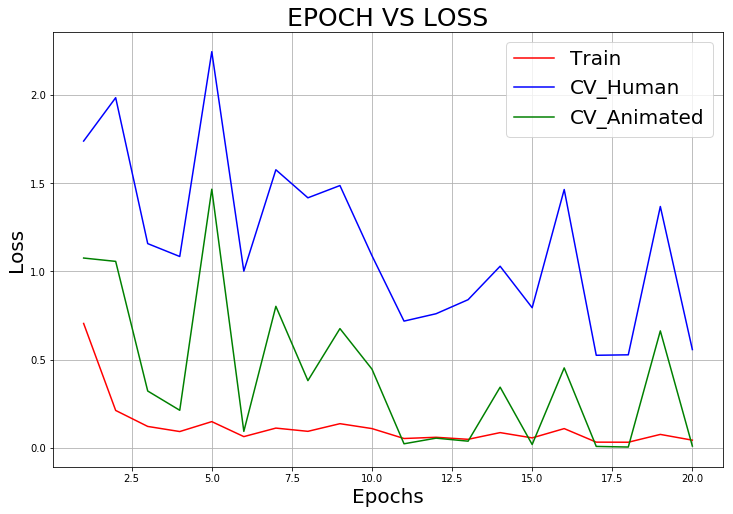

In [129]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Loss"]), list(log["CVHuman_Loss"]), list(log["CVAnime_Loss"]), "EPOCH VS LOSS")

In [130]:
def plotting(epoch, train_acc, CVHuman_acc, CVAnimated_acc, title):
    fig, axes = plt.subplots(1,1, figsize = (12, 8))
    axes.plot(epoch, train_acc, color = 'red', label = "Train_Accuracy")
    axes.plot(epoch, CVHuman_acc, color = 'blue', label = "CV_Human_Accuracy")
    axes.plot(epoch, CVAnimated_acc, color = 'green', label = "CV_Animated_Accuracy")
    axes.set_title(title, fontsize = 25)
    axes.set_xlabel("Epochs", fontsize = 20)
    axes.set_ylabel("Accuracy", fontsize = 20)
    axes.grid()
    axes.legend(fontsize = 20)

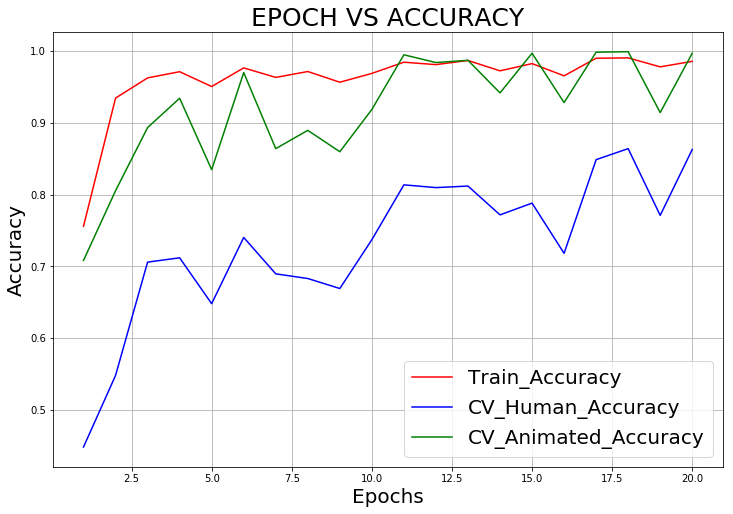

In [131]:
plotting(list(log["Epoch"]), list(log["Comb_Train_Accuracy"]), list(log["CVHuman_Accuracy"]), list(log["CVAnime_Accuracy"]), "EPOCH VS ACCURACY")

## 12. Checking Test Accuracy

In [132]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    # confusionMatx = [[1, 2],
    #                  [3, 4]]
    # confusionMatx.T = [[1, 3],
    #                   [2, 4]]
    # confusionMatx.sum(axis = 1)  axis=0 corresponds to columns and axis=1 corresponds to rows in two diamensional array
    # confusionMatx.sum(axix =1) = [[3, 7]]
    # (confusionMatx.T)/(confusionMatx.sum(axis=1)) = [[1/3, 3/7]
    #                                                  [2/3, 4/7]]

    # (confusionMatx.T)/(confusionMatx.sum(axis=1)).T = [[1/3, 2/3]
    #                                                    [3/7, 4/7]]
    # sum of row elements = 1
    
    labels = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

### Test Data of Human Images

In [167]:
model = load_model("../Data/Model_Save/model.h5")
predicted_labels = []
true_labels = []
batch_size = 10
total_files = int(len(Test_Humans) / batch_size) + 2 #here, I have added 2 because there are 30 files in Test_Humans
for i in range(1, total_files, 1):
    img_load = np.load("../Data/Bottleneck_Features/Bottleneck_TestHumans/bottleneck_{}.npy".format(i))
    img_label = np.load("../Data/Bottleneck_Features/TestHumans_Labels/bottleneck_labels_{}.npy".format(i))
    img_bundle = img_load.reshape(img_load.shape[0], img_load.shape[1]*img_load.shape[2]*img_load.shape[3])
    for j in range(img_bundle.shape[0]):
        img = img_bundle[j]
        img = img.reshape(1, img_bundle.shape[1])
        pred = model.predict(img)
        predicted_labels.append(pred[0].argmax())
        true_labels.append(img_label[j].argmax())
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy on Human Test Data = {}%".format(np.round(float(acc*100), 2)))

Accuracy on Human Test Data = 66.81%


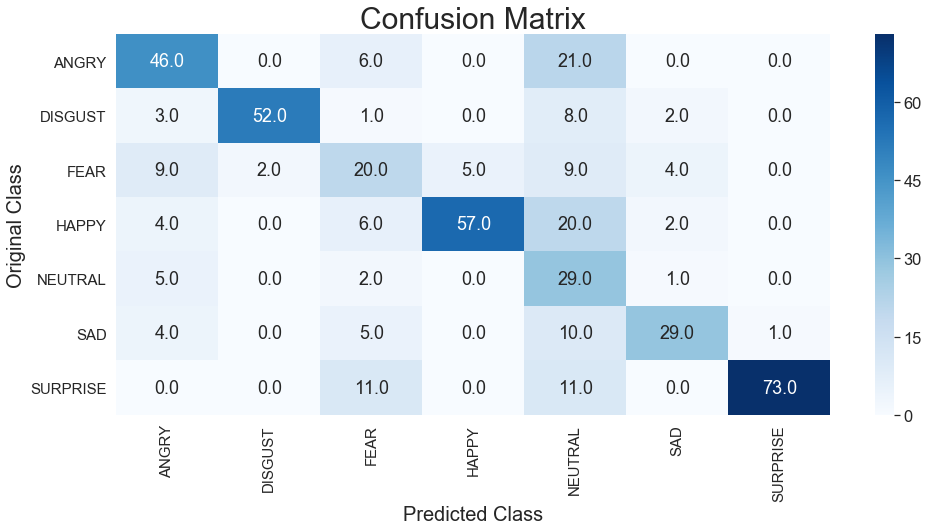

-----------------------------------------------------------------------------------------------------------------------------


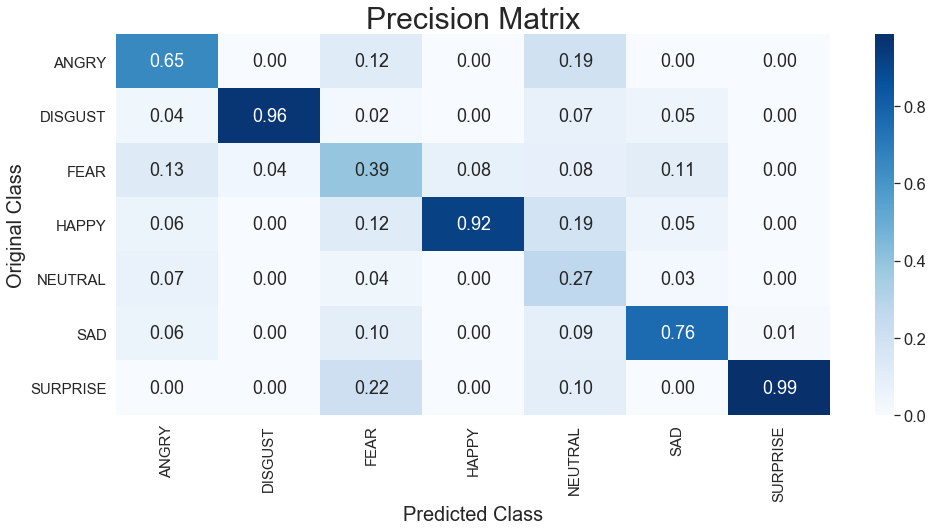

-----------------------------------------------------------------------------------------------------------------------------


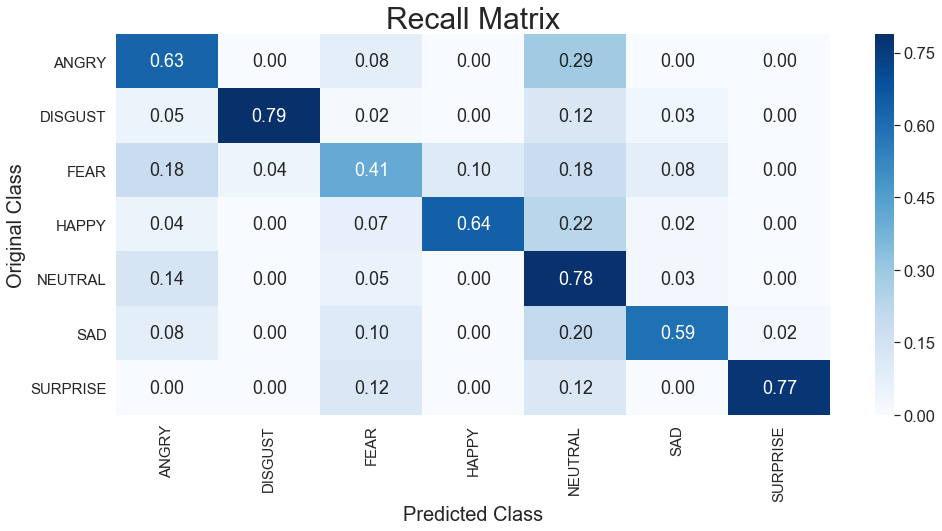

In [168]:
print_confusionMatrix(true_labels, predicted_labels)

### Test Data of Animated Images

In [ ]:
model = load_model("../Data/Model_Save/model.h5")
predicted_labels = []
true_labels = []
batch_size = 10
total_files = int(len(Test_Animated) / batch_size) + 1
for i in range(1, total_files, 1):
    img_load = np.load("../Data/Bottleneck_Features/Bottleneck_TestAnimated/bottleneck_{}.npy".format(i))
    img_label = np.load("../Data/Bottleneck_Features/TestAnimated_Labels/bottleneck_labels_{}.npy".format(i))
    img_bundle = img_load.reshape(img_load.shape[0], img_load.shape[1]*img_load.shape[2]*img_load.shape[3])
    for j in range(img_bundle.shape[0]):
        img = img_bundle[j]
        img = img.reshape(1, img_bundle.shape[1])
        pred = model.predict(img)
        predicted_labels.append(pred[0].argmax())
        true_labels.append(img_label[j].argmax())
acc = accuracy_score(true_labels, predicted_labels)
print("Accuracy on Animated Test Data = {}%".format(np.round(float(acc*100), 2)))

In [ ]:
print_confusionMatrix(true_labels, predicted_labels)

## 13. Testing on Real World with Still Images

In [ ]:
# Now for testing the model on real world images we have to follow all of the same steps which we have done on our training, CV
# and test images. Like here we have to first pre-preocess our images then create its VGG-16 bottleneck features then pass those 
# bottleneck features through our own MLP model for prediction.
# Steps are as follows:
# 1. Read the image, convert it to grayscale and save it.
# 2. Read that grayscale saved image, the detect face in it using HAAR cascade.
# 3. Crop the image to the detected face and resize it to 350*350 and save the image.
# 4. Read that processed cropped-resized image, then reshape it and normalize it.
# 5. Then feed that image to VGG-16 and create bottleneck features of that image and then reshape it.
# 6. Then use our own model for final prediction of expression.

In [ ]:
EMOTION_DICT = {1:"ANGRY", 2:"DISGUST", 3:"FEAR", 4:"HAPPY", 5:"NEUTRAL", 6:"SAD", 7:"SURPRISE"}
model_VGG = VGG16(weights='imagenet', include_top=False)
model_top = load_model("../Data/Model_Save/model.h5")

In [ ]:
def make_prediction(path):
    #converting image to gray scale and save it
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(path, gray)
    
    #detect face in image, crop it then resize it then save it
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    img = cv2.imread(path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    if faces is not ():
        for (x,y,w,h) in faces:
            face_clip = img[y:y+h, x:x+w]
            cv2.imwrite(path, cv2.resize(face_clip, (350, 350)))
    if faces is ():
        cv2.imwrite(path, cv2.resize(gray, (350, 350)))
    #read the processed image then make prediction and display the result
    read_image = cv2.imread(path)
    read_image = read_image.reshape(1, read_image.shape[0], read_image.shape[1], read_image.shape[2])
    read_image_final = read_image/255.0  #normalizing the image
    VGG_Pred = model_VGG.predict(read_image_final)  #creating bottleneck features of image using VGG-16.
    VGG_Pred = VGG_Pred.reshape(1, VGG_Pred.shape[1]*VGG_Pred.shape[2]*VGG_Pred.shape[3])
    top_pred = model_top.predict(VGG_Pred)  #making prediction from our own model.
    emotion_label = top_pred[0].argmax() + 1
    print("Predicted Expression Probabilities")
    print("ANGRY: {}\nDISGUST: {}\nFEAR: {}\nHAPPY: {}\nNEUTRAL: {}\nSAD: {}\nSURPRISE: {}\n\n".format(top_pred[0][0], top_pred[0][1], top_pred[0][2], top_pred[0][3], top_pred[0][4], top_pred[0][5], top_pred[0][6]))
    print("Dominant Probability = "+str(EMOTION_DICT[emotion_label])+": "+str(max(top_pred[0])))

### ANGRY

### Correct Result

In [ ]:
Image.open("../Data/Test_Images/Angry_1.JPG")

In [ ]:
make_prediction("../Data/Test_Images/Angry_1.JPG")

### Correct Result

In [ ]:
Image.open("../Data/Test_Images/Angry_2.png")

In [ ]:
make_prediction("../Data/Test_Images/Angry_2.png")

### DISGUST

### Incorrect Result

In [ ]:
Image.open("../Data/Test_Images/Disgust_1.jpg")

In [ ]:
make_prediction("../Data/Test_Images/Disgust_1.jpg")

### Correct Result

In [ ]:
Image.open("../Data/Test_Images/Disgust_2.png")

In [ ]:
make_prediction("../Data/Test_Images/Disgust_2.png")

### FEAR

### Correct Result

In [ ]:
Image.open("../Data/Test_Images/Fear_1.jpg")

In [ ]:
make_prediction("../Data/Test_Images/Fear_1.jpg")

### Correct Result

In [ ]:
Image.open("../Data/Test_Images/Fear_2.png")

In [ ]:
make_prediction("../Data/Test_Images/Fear_2.png")

### HAPPY

### Correct Result

In [ ]:
Image.open("../Data/Test_Images/Happy_1.jpg")

In [ ]:
make_prediction("../Data/Test_Images/Happy_1.jpg")

### Correct Result

In [ ]:
Image.open("../Data/Test_Images/Happy_2.png")

In [ ]:
make_prediction("../Data/Test_Images/Happy_2.png")

### Neutral

### Correct Result

In [ ]:
Image.open("../Data/Test_Images/Neutral_1.jpg")

In [ ]:
make_prediction("../Data/Test_Images/Neutral_6.jpg")

### Sad

### Correct Prediction

In [ ]:
Image.open("../Data/Test_Images/Sad_1.jpg")

In [ ]:
make_prediction("../Data/Test_Images/Sad_1.jpg")

### Correct Prediction

In [ ]:
Image.open("../Data/Test_Images/Sad_2.png")

In [ ]:
make_prediction("../Data/Test_Images/Sad_2.png")

### Surprise

### Correct Prediction

In [ ]:
Image.open("../Data/Test_Images/Surprise_1.jpg")

In [ ]:
make_prediction("../Data/Test_Images/Surprise_1.jpg")

### Correct Prediction

In [ ]:
Image.open("../Data/Test_Images/Surprise_2.png")

In [ ]:
make_prediction("../Data/Test_Images/Surprise_2.png")

In [ ]:
Image.open("../Data/Test_Images/Surprise_3.jpg")

In [ ]:
make_prediction("../Data/Test_Images/Surprise_3.jpg")

In [ ]:
# cnt_correct = 0
# cnt_incorrect = 0
# for i, d in df_anime_test.iterrows():
#     img_path = os.path.join(d["folderName"], d["imageName"])
#     im_size = cv2.imread(img_path).shape
#     if im_size == (350, 350, 3):
#         cnt_correct += 1
#     else:
#         cnt_incorrect += 1
# print("Correct = "+str(cnt_correct))
# print("incorrect = "+str(cnt_incorrect))

In [ ]:
# a = Train_Combined
# randInt = np.random.randint(0, a.shape[0], size = (1))[0]
# emotion = a["Emotion"][randInt]
# label = a["Labels"][randInt]
# path1 = a["folderName"][randInt]
# path2 = a["imageName"][randInt]
# img = Image.open(os.path.join(path1, path2))
# img

In [ ]:
# print(emotion)
# print(label)

In [ ]:
# count_present = 0
# count_absent = 0
# for i, d in df_angry_reduced.iterrows():
#     path1 = d["folderName"]
#     path2 = d["imageName"]
#     if os.path.isfile(os.path.join(path1, path2)):
#         count_present += 1
#     else:
#         count_absent += 1
# print("Count present = "+str(count_present))
# print("Count absent = "+str(count_absent))